### 获取sybmol，r0_net数据表

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import urllib
import urllib2
import simplejson
import json
import ast
import matplotlib.pyplot as plt
url_all = r'http://vip.stock.finance.sina.com.cn/quotes_service/api/json_v2.php/MoneyFlow.ssl_bkzj_ssggzj?page=1&num=5000&sort=r0_net&asc=0&bankuai=&shichang='

symbol_r0_result = urllib2.urlopen(urllib2.Request(url_all)).read()
fileobj = open('r0_net.txt', 'w')
fileobj.write(symbol_r0_result)
fileobj.close()
!command1
fileobj = open('tmp1.txt', 'r')
tmp2 = fileobj.read()
tmp3 = tmp2.replace('\nr0_net', r',').replace('\"', '')

with open('tmpr0.csv', 'w') as f:
    f.write(tmp3)

pdr0 = pd.read_csv('tmpr0.csv', names=['symbol', 'r0_net'])
pdr0tmp = pdr0.symbol.head(30)
pdr0tmp.to_csv(r'data/list.txt', index=False)
pdr0tmp


K:\notebooks\financial\sina>sed s/symbol/\nsymbol/g r0_net.txt   | sed s/r0_net/\nr0_net/g   | sed s/,name/\nname/g   | sed s/,r3_in/\nr3_in/g   | grep -Es "symbol|r0_net"   | sed s/symbol//g   | sed s/://g  1>tmp1.txt 


0     sz000885
1     sz002651
2     sz002346
3     sh600148
4     sz000825
5     sz002560
6     sz000877
7     sh601996
8     sh600028
9     sz000993
10    sz002046
11    sz002330
12    sz002395
13    sz002040
14    sz002307
15    sh601669
16    sz002549
17    sh601988
18    sh601939
19    sh601398
20    sh603319
21    sh601288
22    sz002711
23    sz000656
24    sz002534
25    sz000557
26    sz002110
27    sz000605
28    sh601818
29    sz300175
Name: symbol, dtype: object

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import urllib
import urllib2
import simplejson
import json
import ast
import matplotlib.pyplot as plt

opendate=lambda x: x['opendate']
trade=lambda x: x['trade']
#changeratio=lambda x: x['changeratio'][:4]

def changeratio(x):
    #changeratio1 = repr(x['changeratio'])
    changeratio1 = x['changeratio'].encode('utf-8')
    return changeratio1
turnover=lambda x: x['turnover']
netamount=lambda x: x['netamount']
ratioamount=lambda x: x['ratioamount']
r0=lambda x: x['r0']
r1=lambda x: x['r1']
r2=lambda x: x['r2']
r3=lambda x: x['r3']
r0_net=lambda x: x['r0_net']
r1_net=lambda x: x['r1_net']
r2_net=lambda x: x['r2_net']
r3_net=lambda x: x['r3_net']
jsonloadfun = lambda x: json.loads(x)
ggzjl = r'http://vip.stock.finance.sina.com.cn/quotes_service/api/json_v2.php/MoneyFlow.ssl_qsfx_lscjfb?page=1&num=20000&sort=opendate&asc=0&daima='


def getdata(idstr):
    c1id = idstr
    replacestr = lambda strbad: strbad.replace('{', '{\"').replace(':\"', '\":\"').replace(',', ',\"').replace('\"{', '{')
    getdata = lambda stockid: urllib2.urlopen(urllib2.Request(ggzjl+str(stockid))).read()
    tmpresult = map(getdata, c1id)
    mapedresult = map(replacestr,tmpresult)
    jsonresult = map(jsonloadfun, mapedresult)
    frame = pd.DataFrame(jsonresult)
    import string
    s1 = frame.ix[0]
    s1opendate = s1.apply(opendate)
    s1trade = s1.apply(trade)
    s1.apply(netamount)
    frame.applymap(opendate)
    frame.applymap(netamount)
    frame.index=c1id
    frame.columns=[s1opendate]
    #frame.index.names = ['stockid', 'trade']
    frame.columns.names = ['opendate']
    frame1 = frame.applymap(netamount).applymap(string.atof).applymap(lambda x: x / 10 ** 4)

    frametrade = frame.applymap(trade).applymap(string.atof)
    frametrade.index=['trade']

    frame_changeratio = frame.applymap(changeratio).applymap(string.atof).applymap(lambda x: x * 100)
    frame_changeratio.index=['changeratio']

    framer0_net = frame.applymap(r0_net).applymap(string.atof).applymap(lambda x: x / 10 ** 4)
    framer0_net.index=['r0_net']

    framer1_net = frame.applymap(r1_net).applymap(string.atof).applymap(lambda x: x / 10 ** 4)
    framer1_net.index=['r1_net']

    framer2_net = frame.applymap(r2_net).applymap(string.atof).applymap(lambda x: x / 10 ** 4)
    framer2_net.index=['r2_net']

    framer3_net = frame.applymap(r3_net).applymap(string.atof).applymap(lambda x: x / 10 ** 4)
    framer3_net.index=['r3_net']

    frame1 = frame1.append(frametrade).append(frame_changeratio).append(framer0_net).append(framer1_net).append(framer2_net).append(framer3_net)
    frame1.head()
    frame2 = frame1.T
    frame2.head()
    frame2.to_csv(c1id[0] + '.csv')
    return frame2

def getcount(framex, count, stockid):
    frame3 = pd.DataFrame(framex[count:].r0_net.sort_values(ascending=True).head(20))
    frame4 = pd.DataFrame(framex[count:].r0_net.sort_values(ascending=False).head(20))
    frame5 = pd.DataFrame(columns=['a', 'b', 'c', 'd', 'e'])
    frame5.a = frame3.index
    frame5.b = frame3.r0_net.values
    frame5.c = frame4.index
    frame5.d = frame4.r0_net.values
    frame5.e = frame5.d - abs(frame5.b)
    y = frame5[frame5.e < 0]
    print y.e.count()
    frame5.to_csv(stockid[0] + '_.csv')
    return frame5

### 列表股票历史主力净流入绘图合并显示股东人数趋势

K:\Anaconda\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


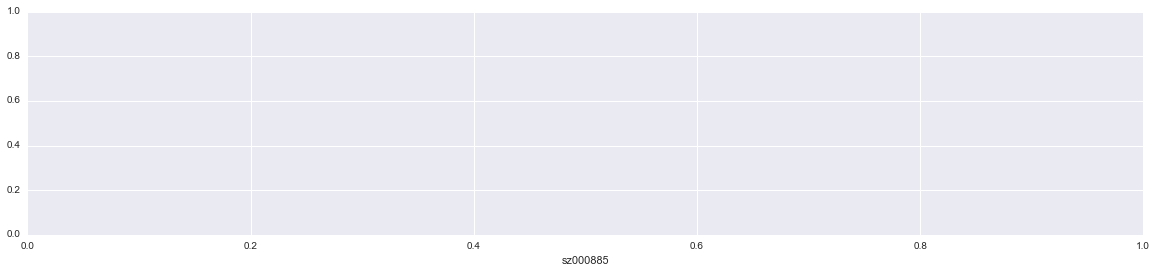

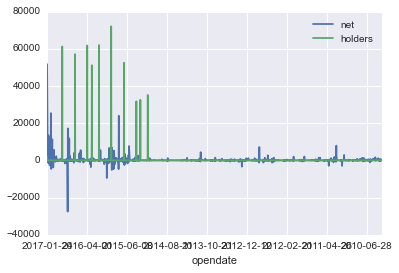

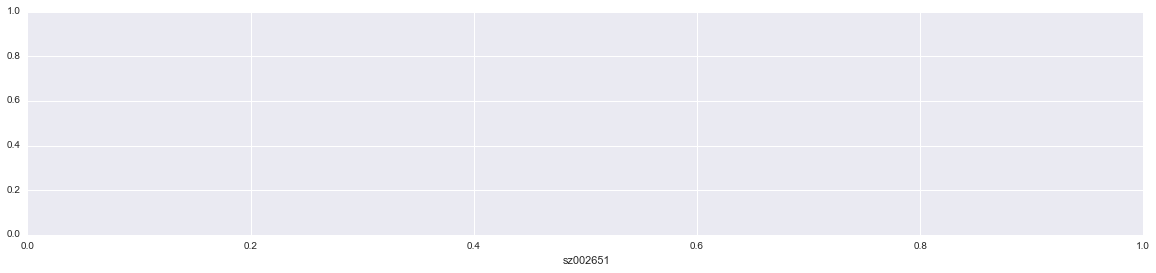

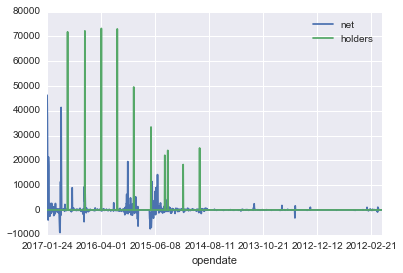

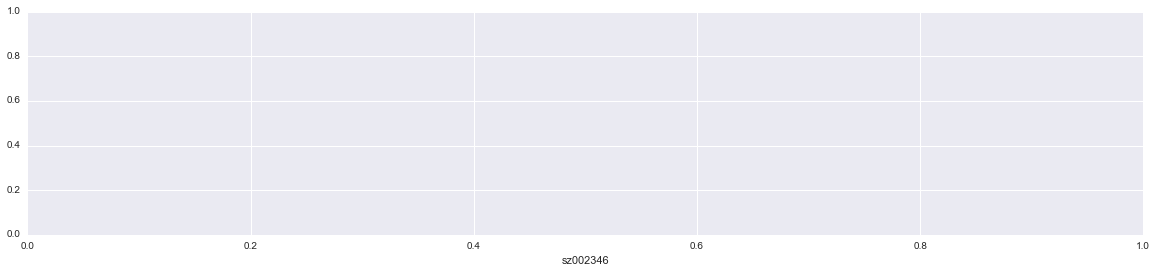

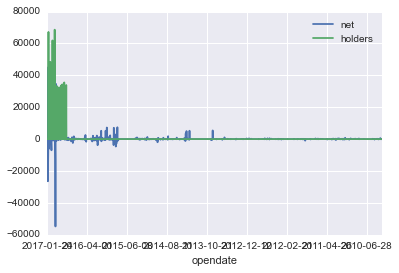

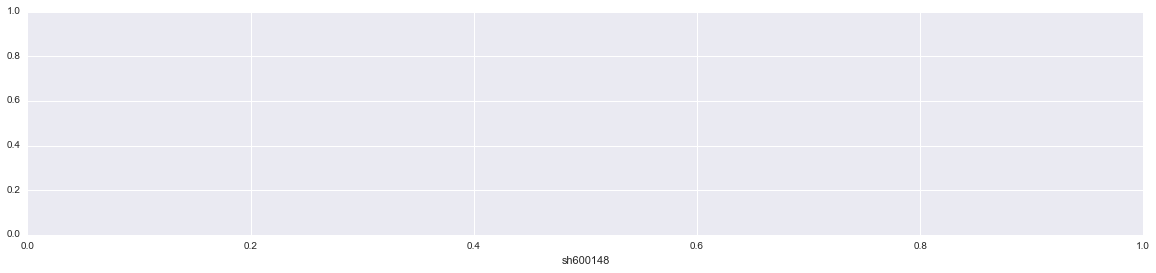

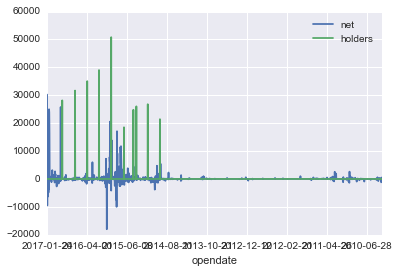

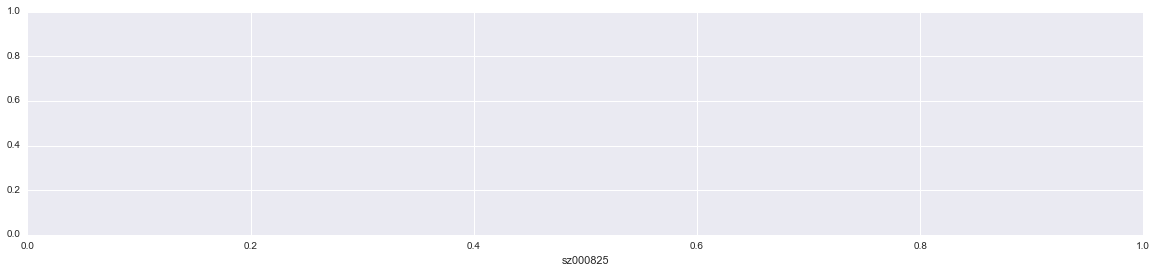

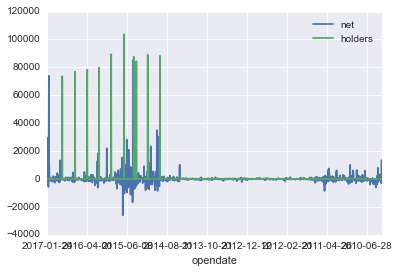

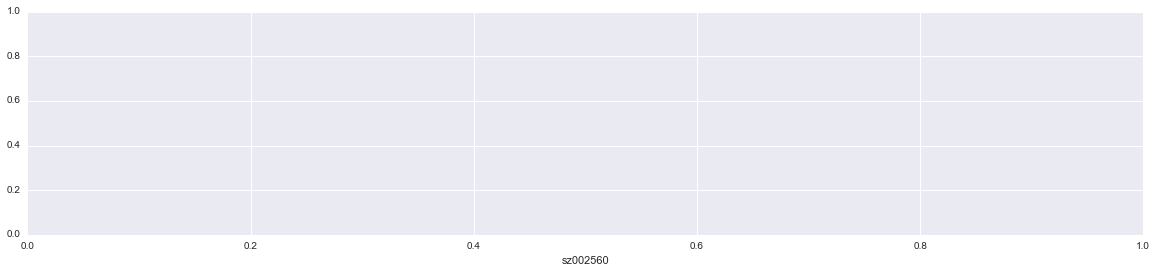

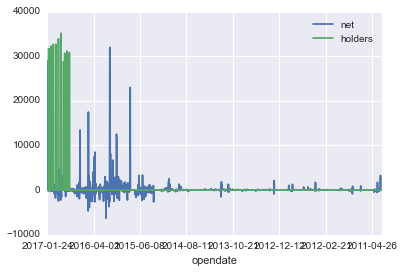

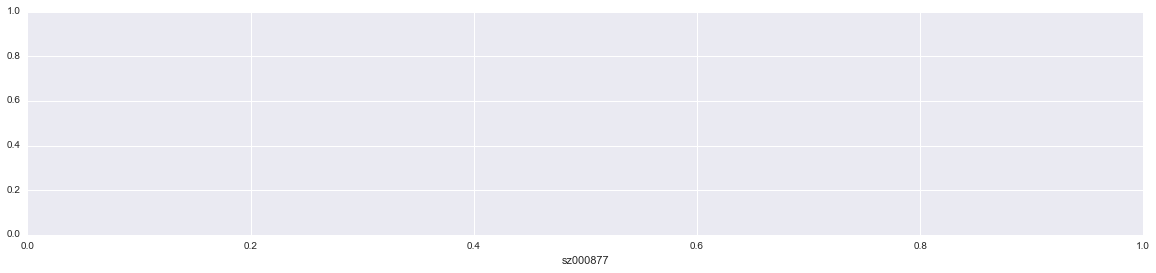

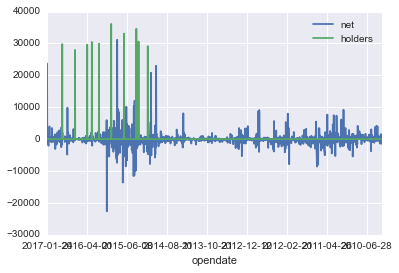

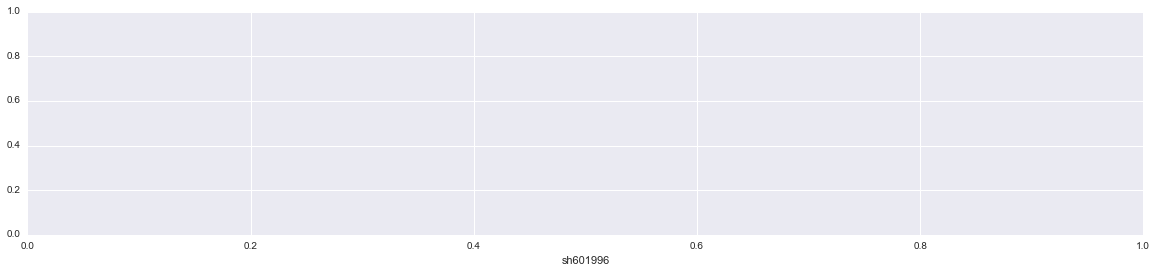

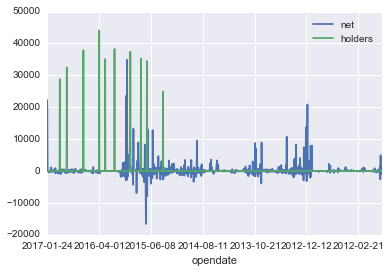

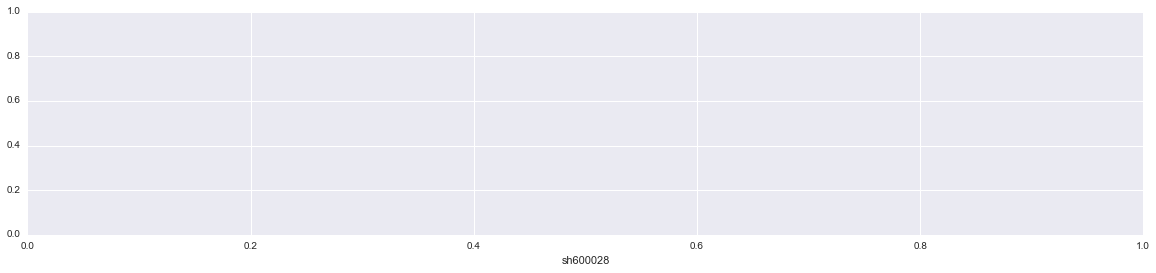

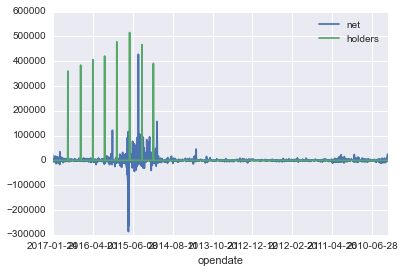

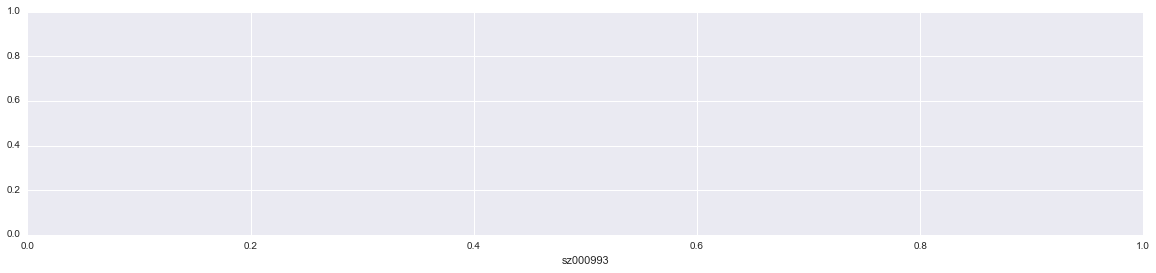

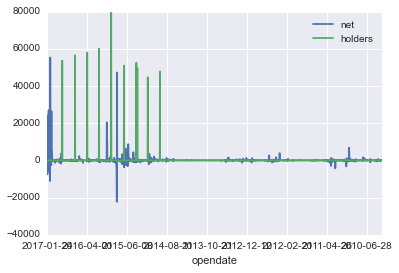

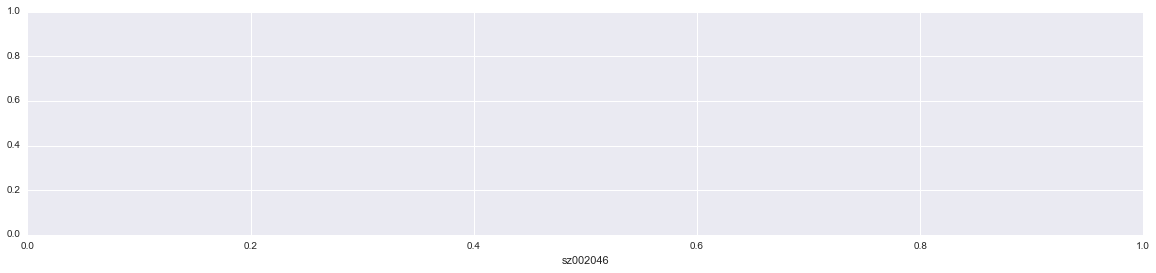

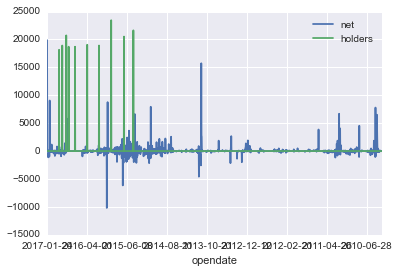

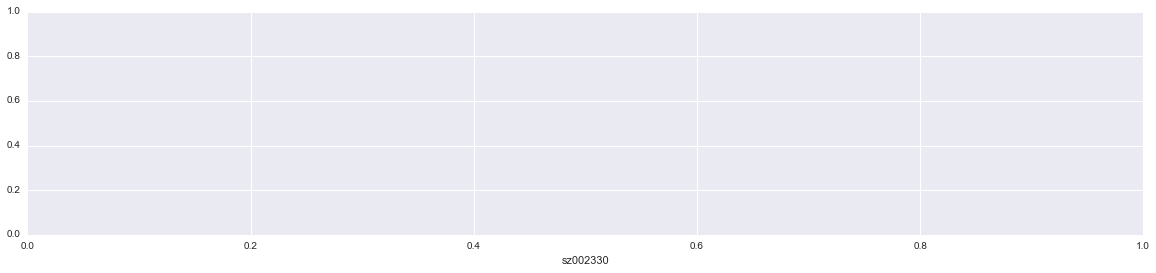

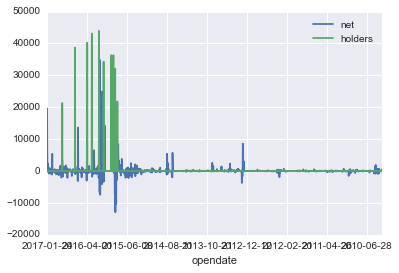

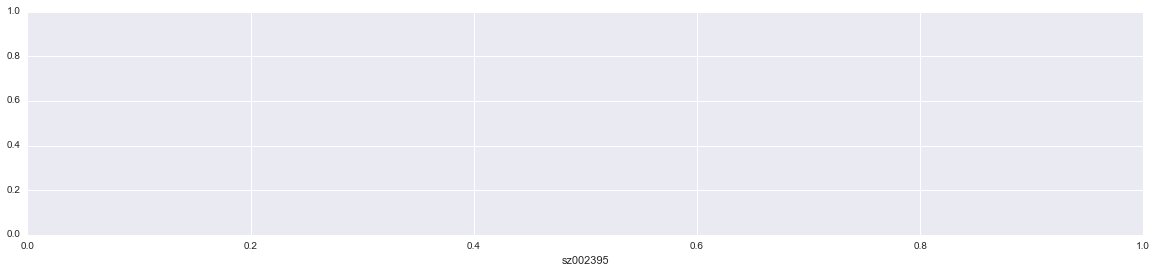

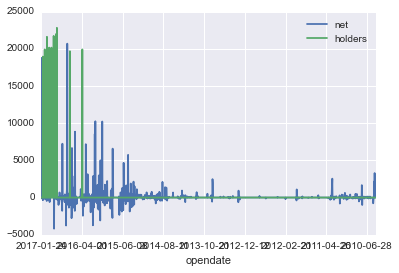

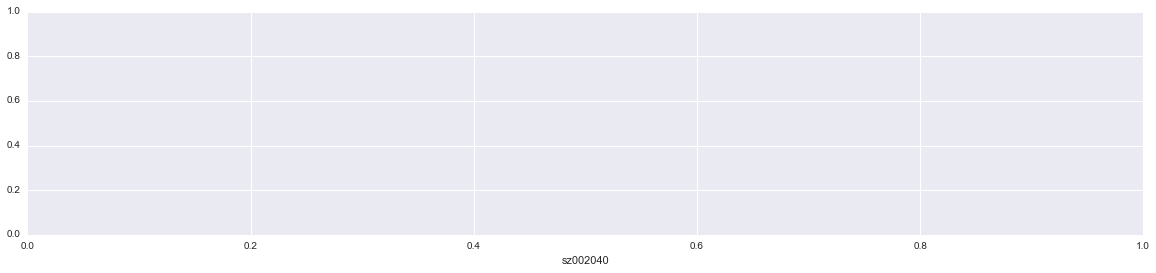

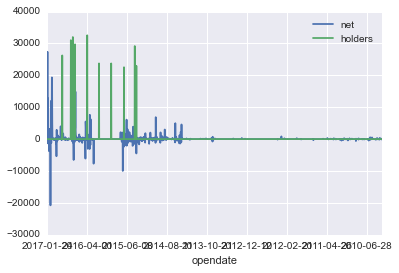

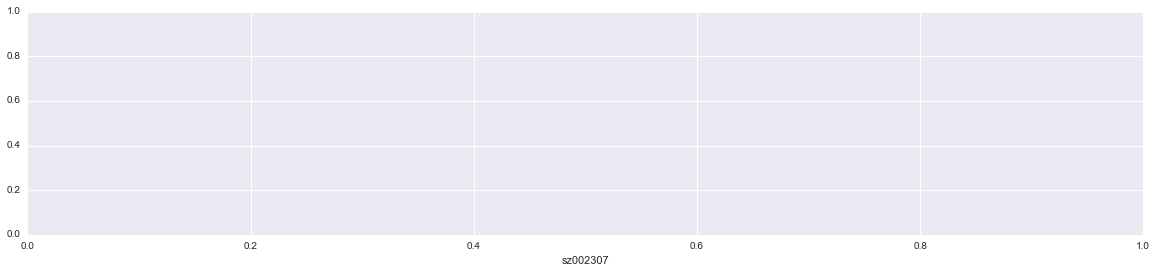

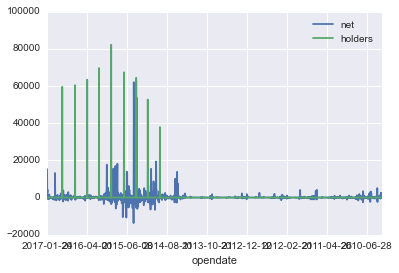

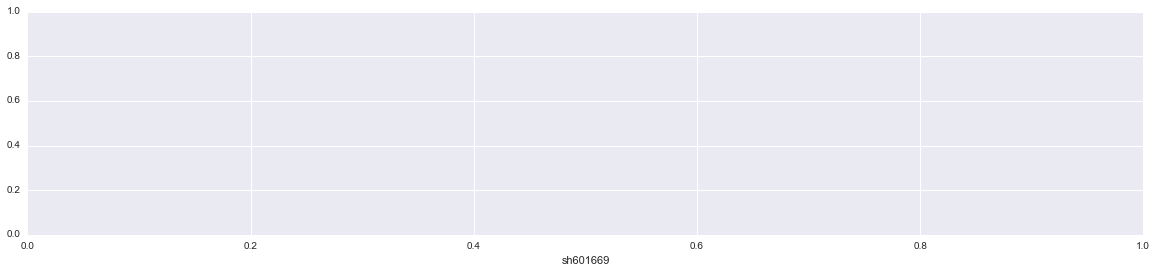

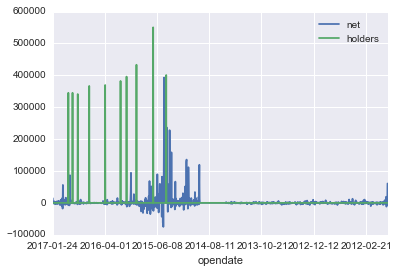

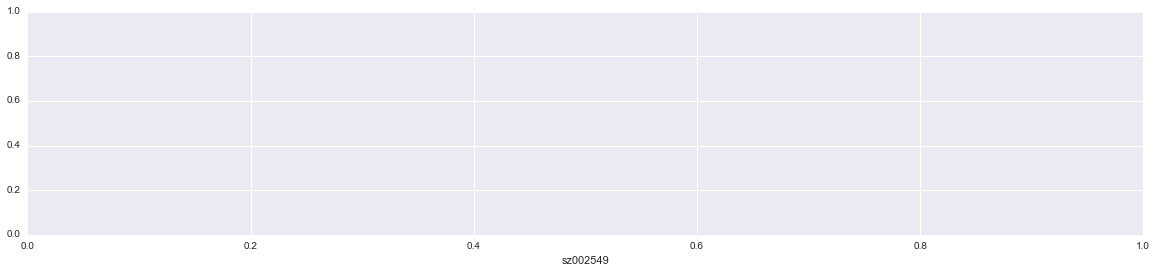

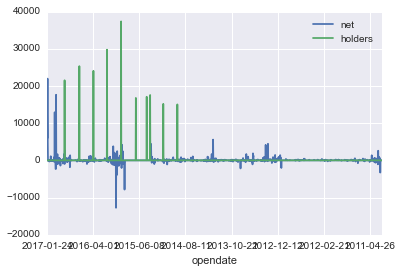

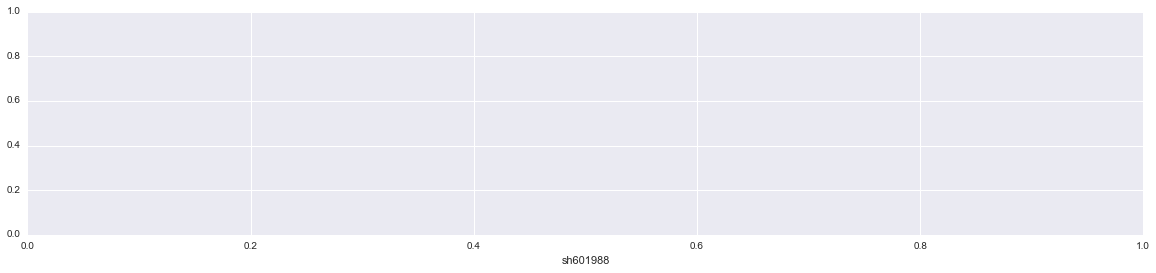

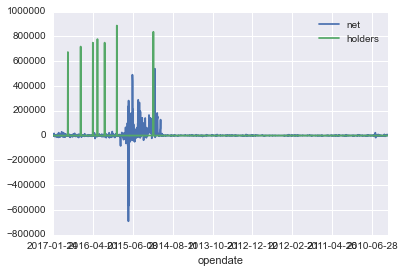

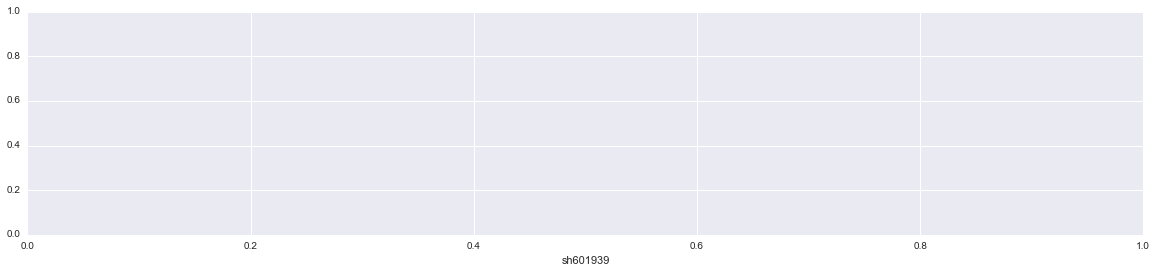

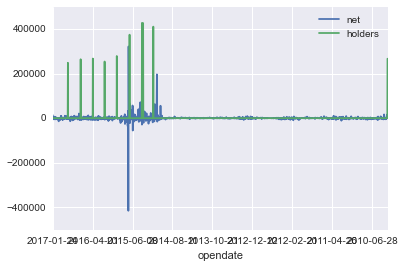

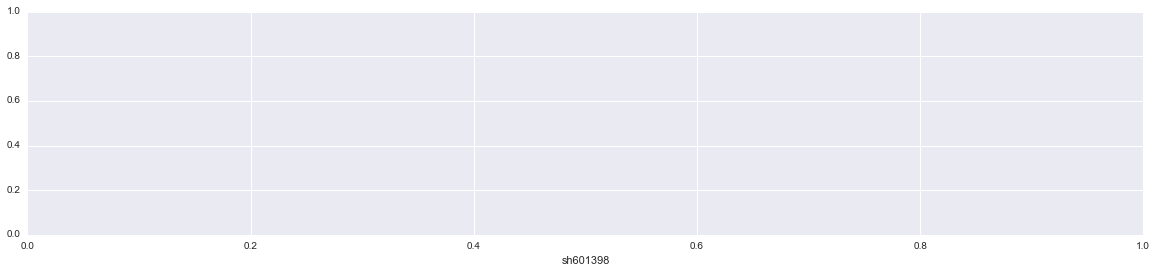

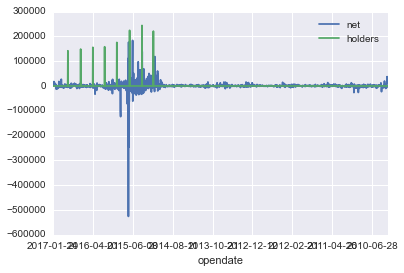

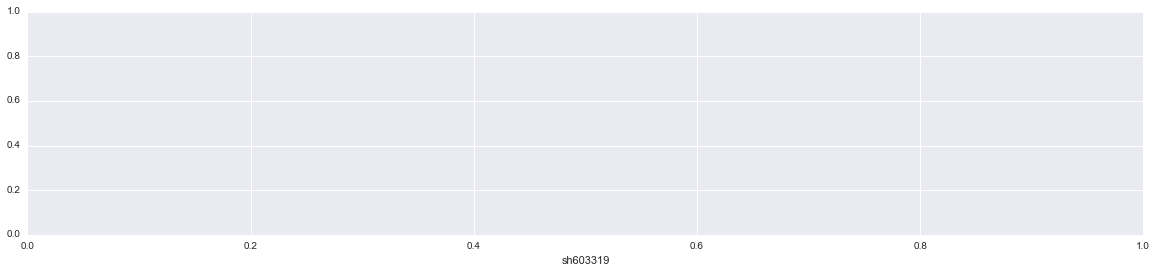

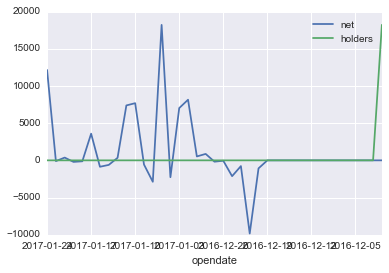

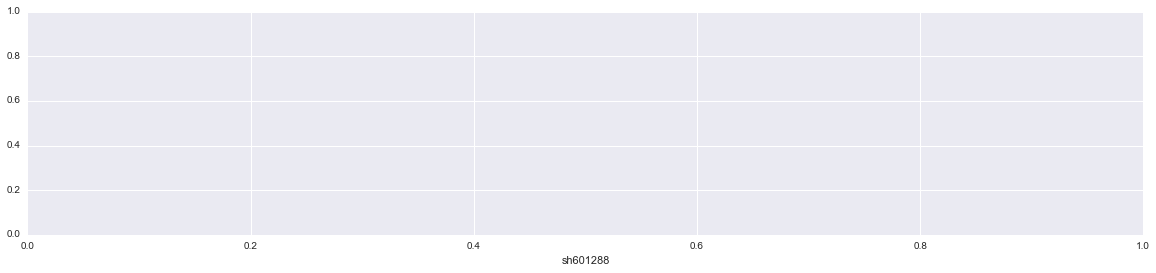

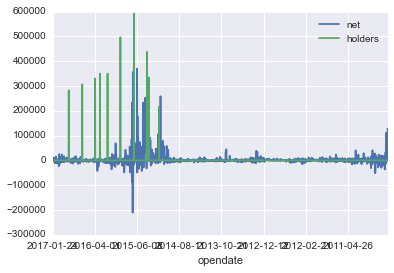

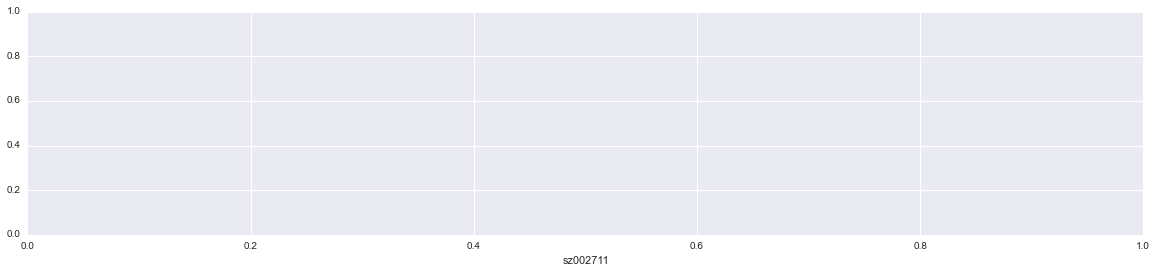

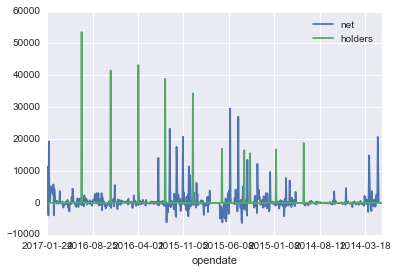

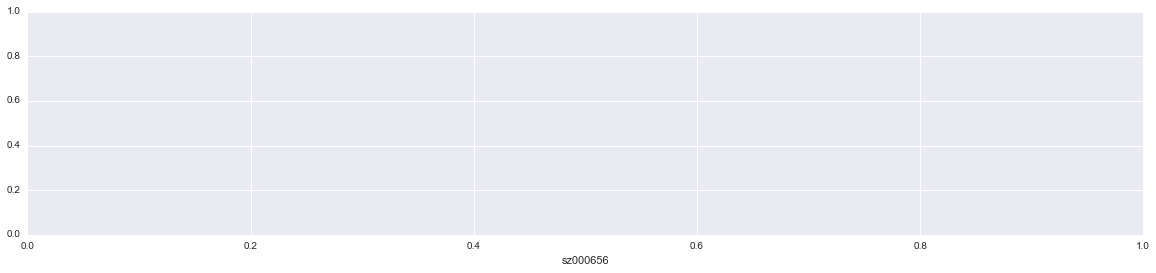

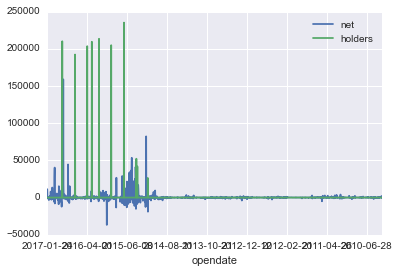

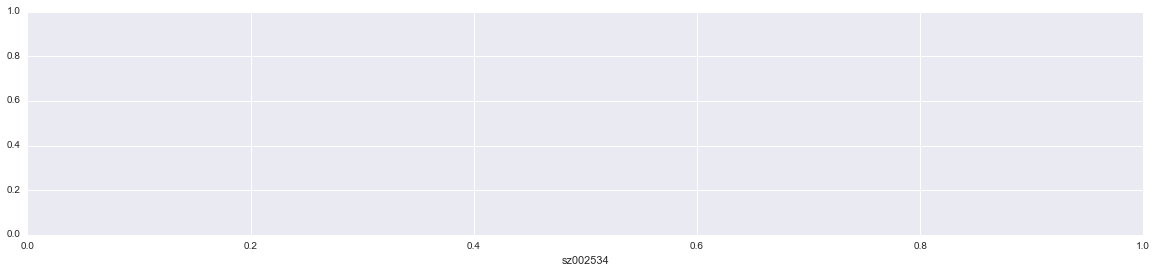

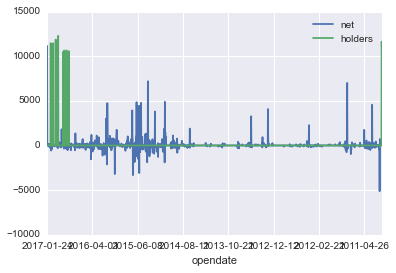

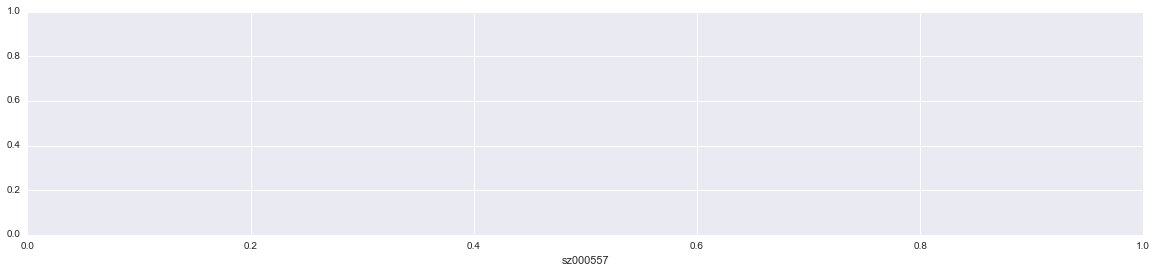

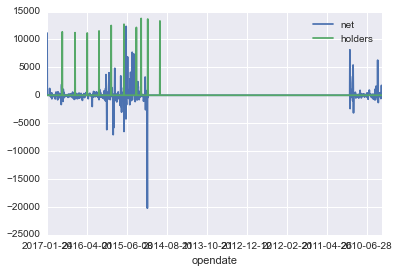

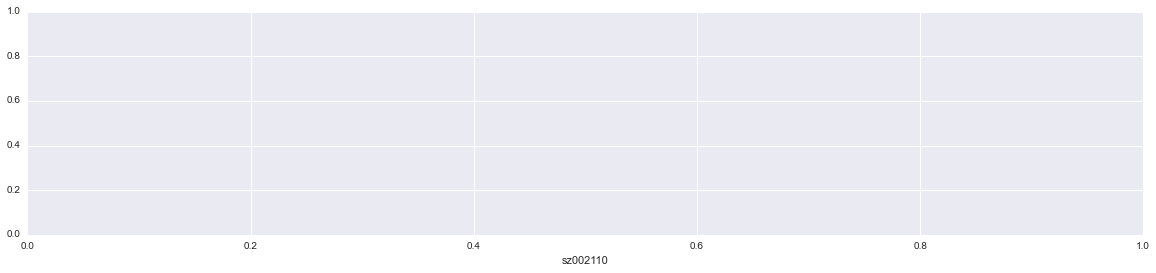

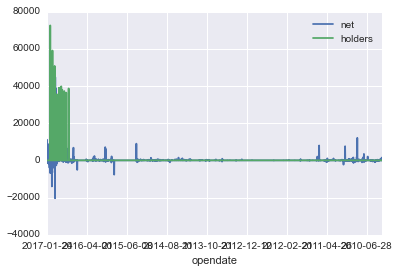

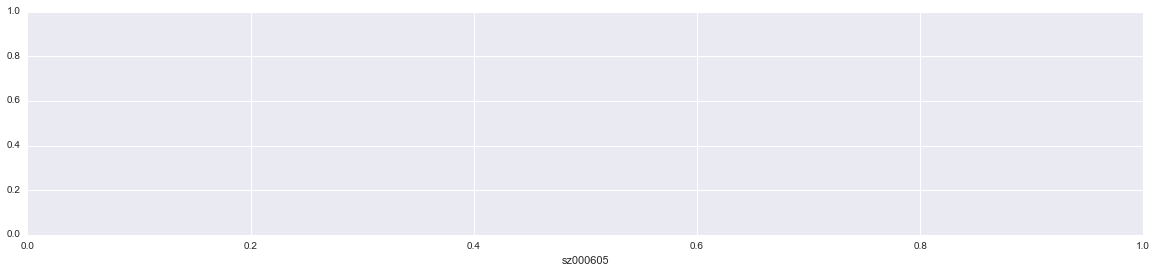

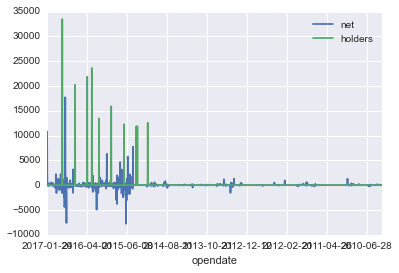

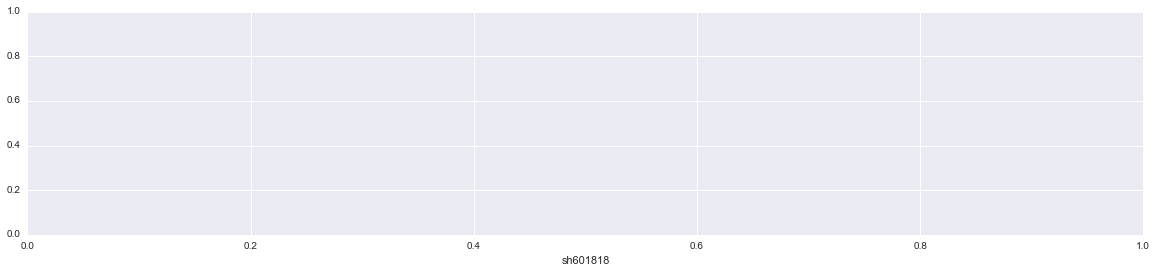

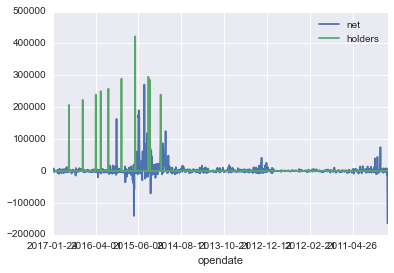

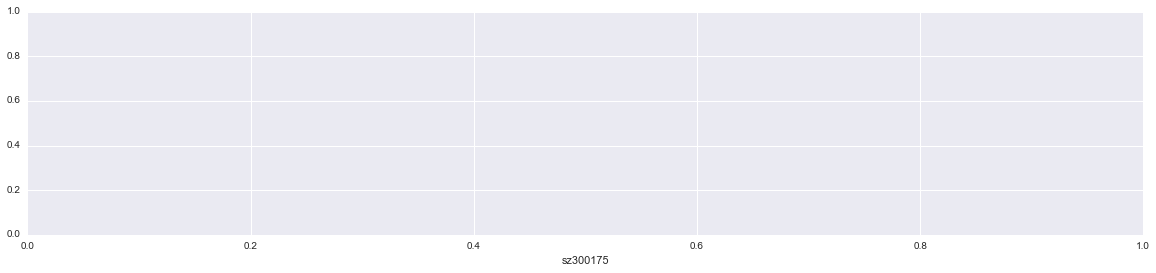

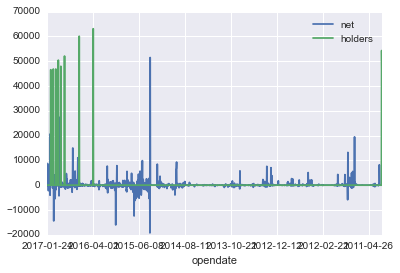

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import urllib
import urllib2
import simplejson
import json
import ast
import matplotlib.pyplot as plt
import time
datenow = time.strftime('%Y-%m-%d',time.localtime(time.time()))
foldername = r'./data/jpg' + datenow
import os
try:
    os.mkdir(foldername)
except:
    pass

def getHolders(stockid):
    urlbase = r'http://f10.eastmoney.com/f10_v2/ShareholderResearch.aspx?code='
    getdata = lambda stockid: urllib2.urlopen(urllib2.Request(urlbase+str(stockid))).read()
    gdrs = pd.read_html(getdata(stockid), header=0)
    #print type(gdrs[0].ix[1:1, 1:])
    
    def getpartifpoint(item):
        tmpitem = item[:-1]
        if tmpitem.find('.') > 0:
            return item[:-1]
        elif tmpitem.find('-') == 0:
            return '-'
        else:
            return '0.' + item[:-1]
        
    #print gdrs[0].ix[0:0, 1:].applymap(getpartifpoint)
    return gdrs[0].ix[0:0, 1:].applymap(getpartifpoint)


ricklist = pd.read_csv(r'./data/list.txt', names='a').a.tolist()
framex = pd.DataFrame()
panel1 = pd.Panel()
dictx = dict()

for stockid in ricklist[:]:
    #print stockid
    global framex
    global dictx
    import time
    time.sleep(5)
    
    framehere = getdata([stockid])
    frameHolders = getHolders(stockid)
    frameHoldersT = frameHolders.T
    frameHoldersT.columns=['holders']
    frameHoldersT.replace('-', np.NAN, inplace=True)
    frameHoldersT.dropna(inplace=True)
    frameHoldersTNumber = frameHoldersT.applymap(lambda item: float(item))
    frameHoldersTNumber.index.name='opendate'
    frameHoldersTNumberIndex = frameHoldersTNumber.index.map(lambda item: '20' + item)
    frameHoldersTNumber.index = frameHoldersTNumberIndex
    f1 = framehere.r0_net
    df1 = pd.DataFrame(f1)
    try:
        
        f2 = frameHoldersTNumber.holders
        times = f1.values.max()/f2.values.mean()
        f2 = frameHoldersTNumber.holders * times
        
        df2 = pd.DataFrame(f2)
        dfm = pd.merge(df1.T, df2.T, how='outer').T
        dfm.columns=['net', 'holders']
        dfm.holders.replace(np.NAN, 0, inplace=True)


        plt.figure(figsize=(20, 4))
        plt.xlabel(stockid)
        dfm.plot()
        #frameHoldersTNumber.holders.ix[:10].plot()

        #dictx[stockid] = framehere

        #plt.plot(panel1[item].r0_net.ix[:10000])
        #framehere.r0_net.ix[:10000].plot()
        #frameHolders.T.ix[:10000].plot()
        plt.savefig(foldername + '/' + stockid + '.jpg', dpi=150, figsize=(20, 4))
    except:
        print stockid + '  error'
        plt.figure(figsize=(20, 4))
        plt.xlabel(stockid)
        df1.plot()
        plt.savefig(foldername + '/' + stockid + '.jpg', dpi=150, figsize=(20, 4))
        pass

### run above

In [118]:
listindex = frame2[16:].head(5).r1_net.sort_values().index
listindex
#查看近3个月的r0_net最大值的日期在这三个月中的先后顺序排名（日期是不是最新的），如中国联通的10月11日，中体产业的10月26日，盛和资源的4月13日

Index([u'2016-11-29', u'2016-11-28', u'2016-11-25', u'2016-12-01',
       u'2016-11-30'],
      dtype='object', name=u'opendate')

In [126]:
#c1 = pd.read_csv(r'./data/list.txt', names='a').a.tolist()
c1 = ['sh600392']
framex = pd.DataFrame()
for stockid in c1:
    print stockid
    global framex
    framehere = getdata([stockid])
    countnumber = 150
    framex = getcount(framehere, countnumber, [stockid])


sh600392
0


### 列表股票历史主力净流入绘图

sh600029


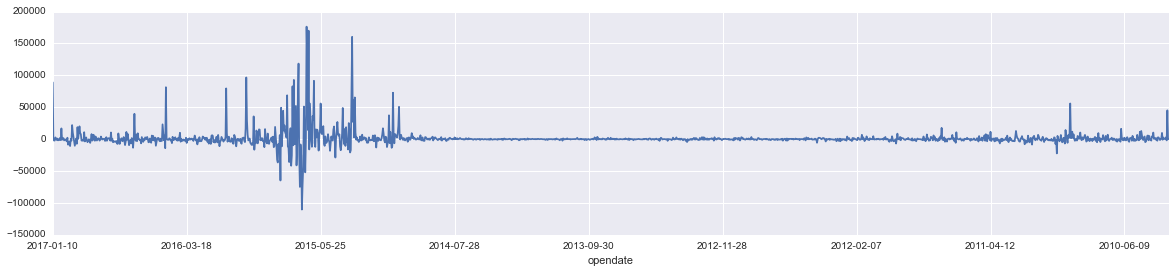

In [113]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import urllib
import urllib2
import simplejson
import json
import ast
import matplotlib.pyplot as plt
import time
datenow = time.strftime('%Y-%m-%d',time.localtime(time.time()))
foldername = r'./data/jpg' + datenow
import os
try:
    os.mkdir(foldername)
except:
    pass
ricklist = pd.read_csv(r'./data/list.txt', names='a').a.tolist()
framex = pd.DataFrame()
panel1 = pd.Panel()
dictx = dict()
for stockid in ricklist[:1]:
    print stockid
    global framex
    global dictx
    framehere = getdata([stockid])
    dictx[stockid] = framehere
    
    plt.figure(figsize=(20, 4))
    plt.xlabel(stockid)
    #plt.plot(panel1[item].r0_net.ix[:10000])
    framehere.r0_net.ix[:10000].plot()
    plt.savefig(foldername + '/' + stockid + '.jpg')

#### ----ending----

In [379]:
frameHolders

,16-09-30,16-06-30,16-03-31,16-02-29,15-12-31,15-09-30,15-06-30,15-03-31,15-03-24,14-12-31
0,0.-,30.1,0.-,32.7,33.4,0.-,50.0,0.-,38.2,31.1


0.0177426047577


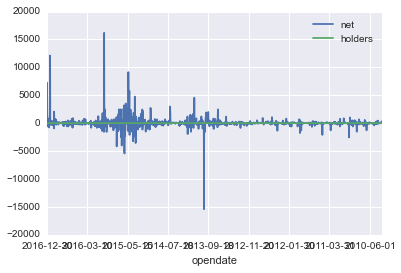

In [351]:
times = f1.values.max()/f2.values.mean()
print times
f1 = framehere.r0_net
f2 = frameHoldersTNumber.holders*times
df1 = pd.DataFrame(f1)
df2 = pd.DataFrame(f2)
dfm = pd.merge(df1.T, df2.T, how='outer').T
dfm.columns=['net', 'holders']
dfm.holders.replace(np.NAN, 0, inplace=True)

dfm.plot()

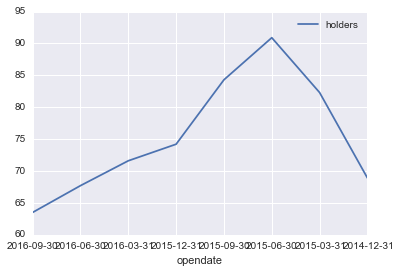

In [252]:
frameHoldersTNumber.index.name='opendate'
frameHoldersTNumber.plot()

In [278]:
f1 = framehere.r0_net
f1.head()

opendate
2016-12-30    -4402.354447
2016-12-29   -13367.783598
2016-12-28     -561.133074
2016-12-27    -9067.570249
2016-12-26     6002.949012
Name: r0_net, dtype: float64

In [328]:
f2 = frameHoldersTNumber.holders*10000
f2

opendate
2016-09-30    635000.0
2016-06-30    677000.0
2016-03-31    716000.0
2015-12-31    742000.0
2015-09-30    843000.0
2015-06-30    909000.0
2015-03-31    823000.0
2014-12-31    689000.0
Name: holders, dtype: float64

In [329]:
df1 = pd.DataFrame(f1)
df1.head()
df1.describe

<bound method DataFrame.describe of                   r0_net
opendate                
2016-12-30  -4402.354447
2016-12-29 -13367.783598
2016-12-28   -561.133074
2016-12-27  -9067.570249
2016-12-26   6002.949012
2016-12-23   2295.522361
2016-12-22  15036.602385
2016-12-21   9396.402375
2016-12-20  -8412.832801
2016-12-19   1623.380151
2016-12-16  -1108.477153
2016-12-15 -10794.683601
2016-12-14  11980.490567
2016-12-13   1851.793414
2016-12-12  -3442.172810
2016-12-09   2431.612207
2016-12-08  -3311.486338
2016-12-07    550.870277
2016-12-06   2764.711455
2016-12-05 -16472.796452
2016-12-02  34415.661078
2016-12-01    986.635974
2016-11-30  -3004.010989
2016-11-29   3818.228889
2016-11-28   7541.495481
2016-11-25  -4691.438692
2016-11-24    658.411447
2016-11-23  -2527.751116
2016-11-22  12674.733117
2016-11-21   9514.821624
...                  ...
2010-04-16  -5102.903701
2010-04-15   5724.837080
2010-04-14   8309.200358
2010-04-13   7853.634740
2010-04-12  -9482.984080
2010-04-09   6

In [330]:
df2 = pd.DataFrame(f2)
df2.describe

<bound method DataFrame.describe of              holders
opendate            
2016-09-30  635000.0
2016-06-30  677000.0
2016-03-31  716000.0
2015-12-31  742000.0
2015-09-30  843000.0
2015-06-30  909000.0
2015-03-31  823000.0
2014-12-31  689000.0>

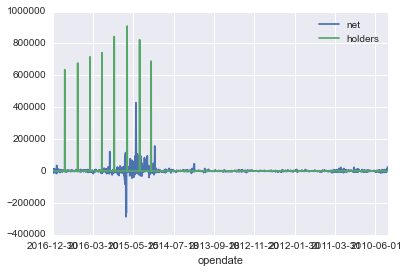

In [333]:
dfm = pd.merge(df1.T, df2.T, how='outer').T
dfm.columns=['net', 'holders']
dfm.holders.replace(np.NAN, 0, inplace=True)
dfm[40:90]
dfm.plot()

In [273]:
frameplot = framehere.append(frameHoldersTNumber)
framehodlers = frameplot.holders.sort_index(ascending=False)
frameplot.icol('holders')

K:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: FutureWarning: icol(i) is deprecated. Please use .iloc[:,i]
  app.launch_new_instance()
K:\Anaconda\lib\site-packages\pandas\indexes\base.py:1264: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [275]:
pd.merge(framehere, frameHoldersTNumber, on='opendate', how='inner')

KeyError: 'opendate'

In [197]:
framehere.ix[0]

sh600028      -5388.584956
trade             5.410000
changeratio       0.000000
r0_net        -4402.354447
r1_net        -1309.004230
r2_net          276.609360
r3_net           46.164361
Name: 2016-12-30, dtype: float64

In [206]:
frameHoldersTNumberIndex = frameHoldersTNumber
frameHoldersTNumberIndex.index = frameHoldersTNumber.index.to_datetime()
frameHoldersTNumberIndex.ix[0]

opendate
holders    63.5
Name: 2016-09-30 00:00:00, dtype: float64

In [177]:
frameHoldersTNumber.columns.names = ['opendate']
frameHoldersTNumberIndex = frameHoldersTNumber.index.map(lambda item: '20' + item)
frameHoldersTNumberIndex
frameHoldersTNumber.index = frameHoldersTNumberIndex
frameHoldersTNumber

opendate,holders
2016-09-30,63.5
2016-06-30,67.7
2016-03-31,71.6
2015-12-31,74.2
2015-09-30,84.3
2015-06-30,90.9
2015-03-31,82.3
2014-12-31,68.9


In [183]:
appendresult = framehere.append(frameHoldersTNumber)
appendresult[60:70]

,changeratio,holders,r0_net,r1_net,r2_net,r3_net,sh600028,trade
opendate,,,,,,,,
2016-09-30,0.206186,NaN,692.125760,-513.459022,-38.219750,142.862084,283.309072,4.86
2016-09-29,1.677150,NaN,3472.716026,720.931771,-402.253266,-300.888494,3490.506037,4.85
2016-09-28,-0.831601,NaN,-5086.450719,-2127.516434,-712.312599,-345.491649,-8271.771401,4.77
2016-09-27,0.208333,NaN,1223.405104,382.988799,-150.292704,-142.433561,1313.667638,4.81
2016-09-26,-1.030930,NaN,-3336.203717,34.723949,158.517891,-125.690371,-3268.652248,4.80
2016-09-23,0.206612,NaN,-205.819375,583.941300,-754.247788,-614.164163,-990.290026,4.85
2016-09-22,1.255230,NaN,5632.357299,590.640932,-1071.551142,-516.144615,4635.302474,4.84
2016-09-21,0.209644,NaN,661.546720,124.181376,-115.868670,358.620163,1028.479589,4.78
2016-09-20,-0.205761,NaN,-4848.460497,-1145.643301,-573.696196,-200.137126,-6767.937120,4.85


In [208]:
pd.merge(framehere, frameHoldersTNumber, how='outer', on='opendate')

KeyError: 'opendate'

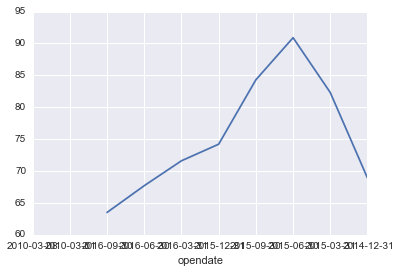

In [194]:
appendresult.holders.ix[-10:].plot()

In [131]:
frameHoldersT = frameHolders.T
frameHoldersT.columns=['holders']
frameHoldersT.replace('-', 0, inplace=True)
frameHoldersTNumber = frameHoldersT.applymap(lambda item: float(item))
frameHoldersTNumber

,holders
16-09-30,63.5
16-06-30,67.7
16-03-31,71.6
16-02-29,0.0
15-12-31,74.2
15-09-30,84.3
15-06-30,90.9
15-03-31,82.3
15-03-13,0.0
14-12-31,68.9


In [120]:

frameHoldersTNumber = frameHoldersT.replace('-', 0, inplace=True).applymap(lambda item: float(item))
frameHoldersTNumber

AttributeError: 'NoneType' object has no attribute 'applymap'

In [91]:
frameHolders.replace('-', 0, inplace=True)
frameHolders.applymap(lambda item: float(item))
frameHoldersTNumber = frameHolders.T.applymap(lambda item: float(item))
frameHoldersTNumber.holders.ix[:10].plot()

,0
16-09-30,63.5
16-06-30,67.7
16-03-31,71.6
16-02-29,0
15-12-31,74.2
15-09-30,84.3
15-06-30,90.9
15-03-31,82.3
15-03-13,0
14-12-31,68.9


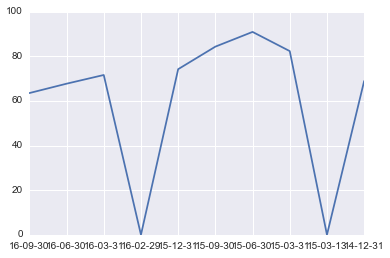

In [113]:
frameHoldersT.columns=['number']
frameHoldersTNumber = frameHoldersT.applymap(lambda item: float(item))
frameHoldersTNumber.number.ix[:10].plot()

In [80]:
frameHolders1 = frameHolders.replace('-', 0)
frameHolders1.applymap(lambda item: float(item))
frameHolders1

,16-09-30,16-06-30,16-03-31,16-02-29,15-12-31,15-09-30,15-06-30,15-03-31,15-03-13,14-12-31
0,63.5,67.7,71.6,0,74.2,84.3,90.9,82.3,0,68.9


ValueError: ('could not convert string to float: ', u'occurred at index 16-02-29')

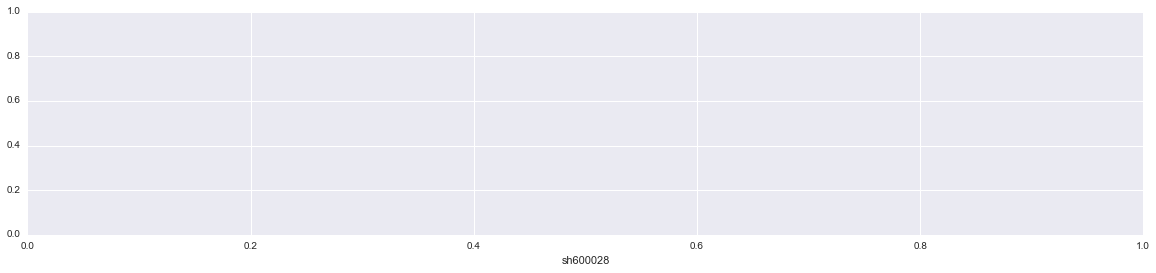

In [76]:
plt.figure(figsize=(20, 4))
plt.xlabel(stockid)
#plt.plot(panel1[item].r0_net.ix[:10000])
frameHolders.applymap(lambda item: float(item[:-1]))

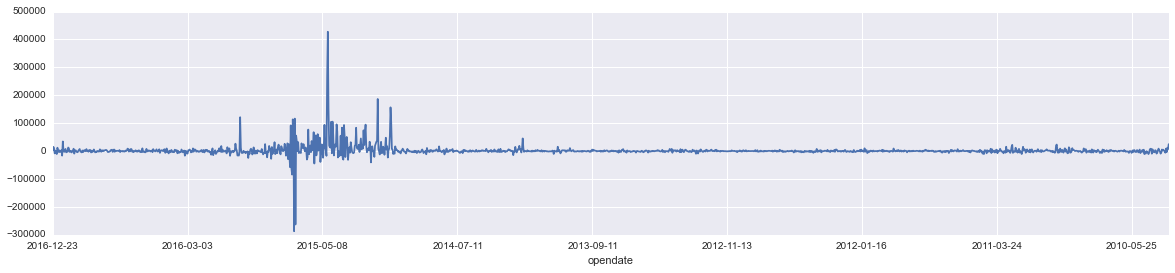

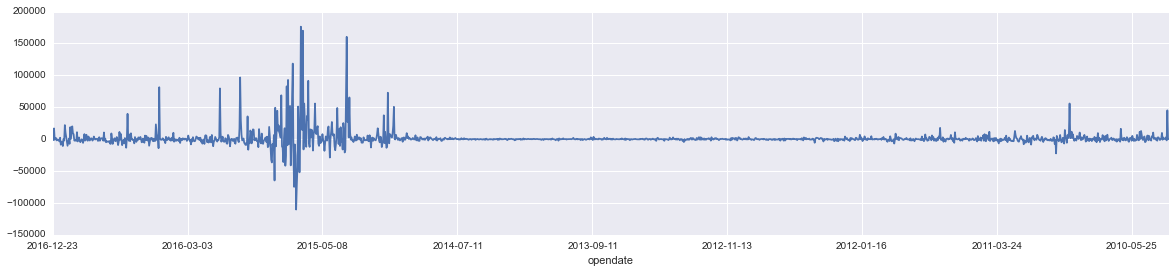

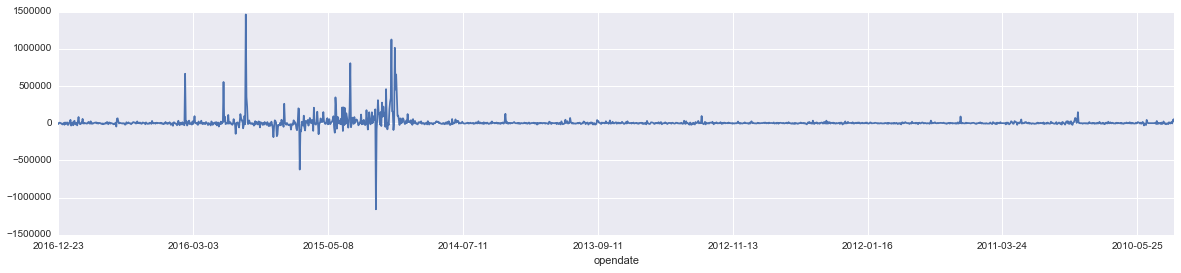

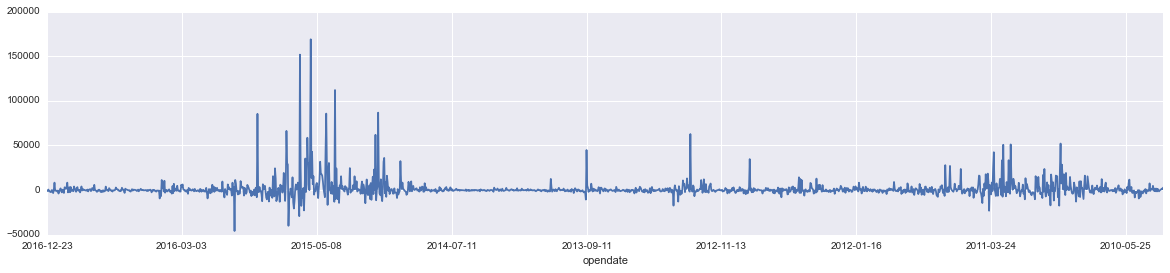

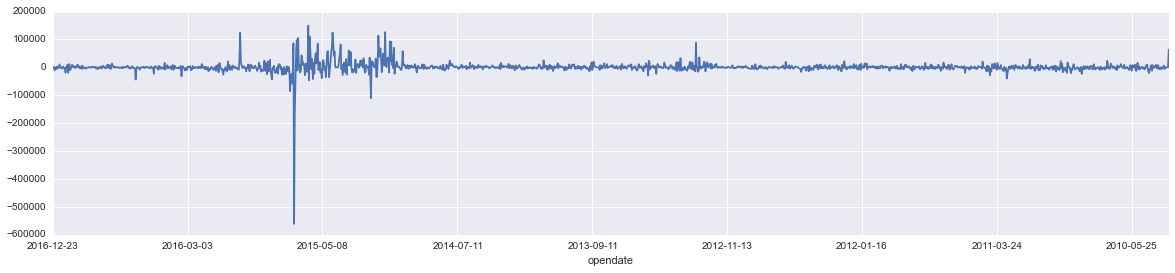

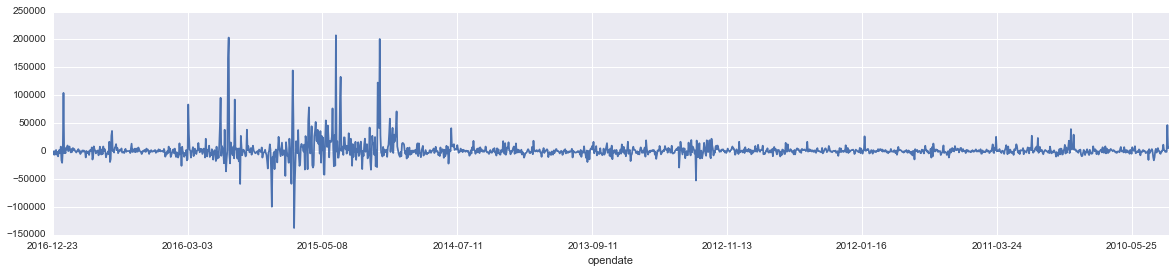

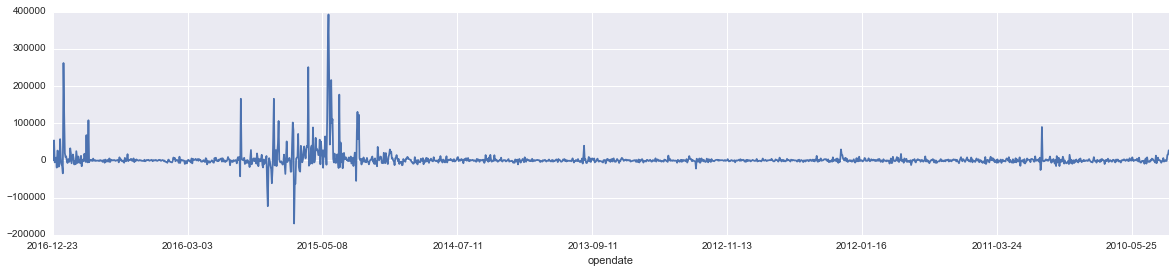

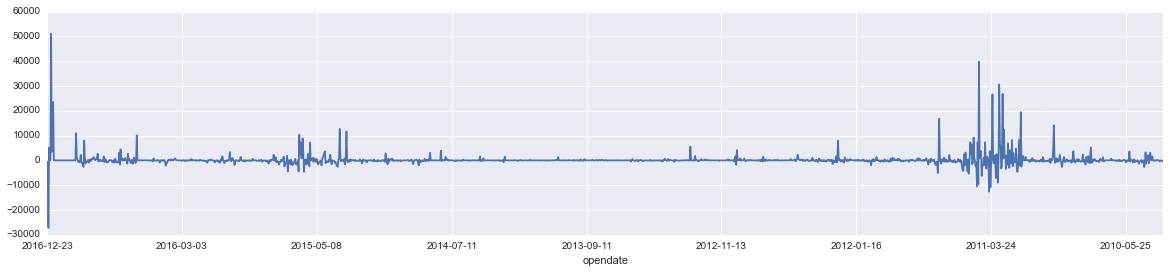

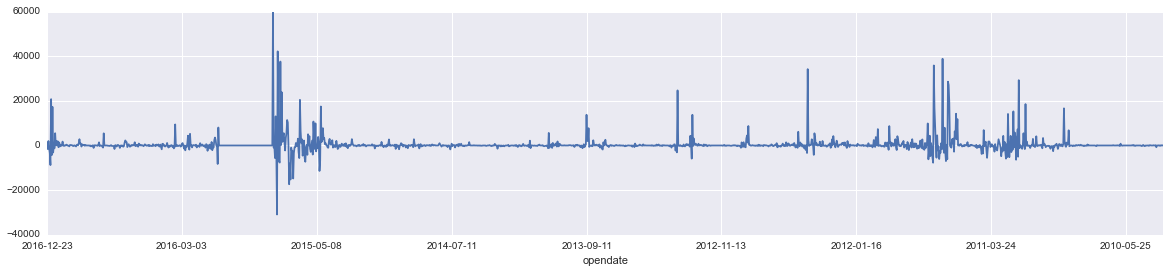

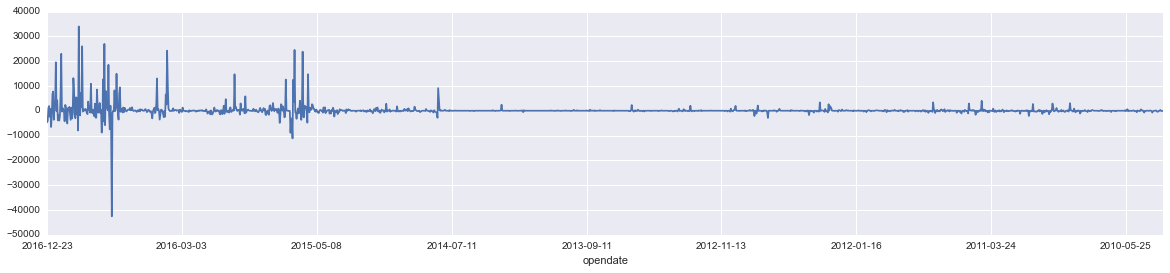

In [84]:
panel1 = pd.Panel(dictx)
itemindexlist = panel1.keys().tolist()
for item in itemindexlist:
    plt.figure(figsize=(20, 4))
    plt.xlabel(item)
    #plt.plot(panel1[item].r0_net.ix[:10000])
    panel1[item].r0_net.ix[:10000].plot()
    plt.savefig(r'./data/jpg/' + item + '.jpg')

In [22]:
frameb.head()

,a,b,c,d,e
0,2015-07-08,-287274.061004,2015-04-27,427533.625045,140259.564041
1,2015-07-06,-263119.406048,2015-04-28,263159.125144,39.719096
2,2015-07-13,-84452.077804,2015-01-05,186621.467140,102169.389336
3,2015-07-14,-61659.361986,2014-12-05,156598.897500,94939.535514
4,2015-07-16,-57697.533900,2015-04-24,152289.118496,94591.584596


In [44]:
x = {ricklist[0]:framea}
y = {ricklist[1]:frameb}
dictx = dict()
dictx[ricklist[0]] = framea
dictx[ricklist[1]] = frameb
dictx
panel1 = pd.Panel(dictx)
panel1

<class 'pandas.core.panel.Panel'>
Dimensions: 2 (items) x 20 (major_axis) x 5 (minor_axis)
Items axis: sh600028 to sh600029
Major_axis axis: 0 to 19
Minor_axis axis: a to e

In [16]:
panel1.head(1)

NotImplementedError: 

In [122]:
framex.head()

AttributeError: 'NoneType' object has no attribute 'head'

# 全股票主力净流入文件生成 (变量：downloadfolder,下载日期个数)

In [127]:
downloadfolder = r'./data/amountall20161225all/'
numtodownload = '10000'
#====args ending====

%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import urllib
import urllib2
import simplejson
import json
import ast
import os
opendate=lambda x: x['opendate']
trade=lambda x: x['trade']
#changeratio=lambda x: x['changeratio'][:4]

def changeratio(x):
    #changeratio1 = repr(x['changeratio'])
    changeratio1 = x['changeratio'].encode('utf-8')
    return changeratio1
turnover=lambda x: x['turnover']
netamount=lambda x: x['netamount']
ratioamount=lambda x: x['ratioamount']
r0=lambda x: x['r0']
r1=lambda x: x['r1']
r2=lambda x: x['r2']
r3=lambda x: x['r3']
r0_net=lambda x: x['r0_net']
r1_net=lambda x: x['r1_net']
r2_net=lambda x: x['r2_net']
r3_net=lambda x: x['r3_net']
jsonloadfun = lambda x: json.loads(x)
ggzjl = r'http://vip.stock.finance.sina.com.cn/quotes_service/api/json_v2.php/MoneyFlow.ssl_qsfx_lscjfb?page=1&num=' + numtodownload + '&sort=opendate&asc=0&daima='

replacestr = lambda strbad: strbad.replace('{', '{\"').replace(':\"', '\":\"').replace(',', ',\"').replace('\"{', '{')
getdata = lambda stockid: urllib2.urlopen(urllib2.Request(ggzjl+str(stockid))).read()

def generatecsv(c1):
    tmpresult = map(getdata, c1)
    mapedresult = map(replacestr,tmpresult)
    jsonresult = map(jsonloadfun, mapedresult)
    frame = pd.DataFrame(jsonresult)
    import string
    s1 = frame.ix[0]
    s1opendate = s1.apply(opendate)
    s1trade = s1.apply(trade)
    s1.apply(netamount)
    frame.applymap(opendate)
    frame.applymap(netamount)
    frame.index=c1
    frame.columns=[s1opendate]
    #frame.index.names = ['stockid', 'trade']
    frame.columns.names = ['opendate']
    frame1 = frame.applymap(netamount).applymap(string.atof).applymap(lambda x: x / 10 ** 4)

    frametrade = frame.applymap(trade).applymap(string.atof)
    frametrade.index=['trade']

    frame_changeratio = frame.applymap(changeratio).applymap(string.atof).applymap(lambda x: x * 100)
    frame_changeratio.index=['changeratio']

    framer0_net = frame.applymap(r0_net).applymap(string.atof).applymap(lambda x: x / 10 ** 4)
    framer0_net.index=['r0_net']

    framer1_net = frame.applymap(r1_net).applymap(string.atof).applymap(lambda x: x / 10 ** 4)
    framer1_net.index=['r1_net']

    framer2_net = frame.applymap(r2_net).applymap(string.atof).applymap(lambda x: x / 10 ** 4)
    framer2_net.index=['r2_net']

    framer3_net = frame.applymap(r3_net).applymap(string.atof).applymap(lambda x: x / 10 ** 4)
    framer3_net.index=['r3_net']

    frame1 = frame1.append(frametrade).append(frame_changeratio).append(framer0_net).append(framer1_net).append(framer2_net).append(framer3_net)
    frame1.head()
    frame2 = frame1.T
    frame2.head()    
    frame2.to_csv(downloadfolder + c1[0] + '.csv')

In [ ]:
os.chdir(r'K:\notebooks\financial\sina')
os.mkdir(downloadfolder)
symbolpd = pd.read_csv('./data/symbolall.txt', header=None)
symbollist = symbolpd[0].values.tolist()
for symbol in symbollist:
    try:
        generatecsv([symbol])
    except:
        pass
            

###### ========================ending============================================

# 合并数据（变量：folder，tocsvfile）

In [7]:
folder = r'./data/amountall201612119/'
tocsvfile = r'../frameleftT20161219.csv'
#====args ending====

import os
os.chdir(r'K:\notebooks\financial\sina')
filelist = os.listdir(folder)
os.chdir(folder)
filelist[0]
result = map(pd.read_csv, filelist)
frame0 = result[0]
frameleft = frame0[['opendate', 'r0_net']]
frameleft.columns = ['opendate', frame0.columns.tolist()[1]]

def appds(frametmp):
    global frameleft
    frameright = frametmp[['opendate', 'r0_net']]
    frameright.columns = ['opendate', frametmp.columns.tolist()[1]]
    frameleft = pd.merge(frameleft, frameright, on='opendate', how='outer')
    
map(appds, result[1:])
frameleft.T.to_csv(tocsvfile)

###### ========================ending============================================

## 排序excel结果(未完成)

In [1]:
downloadfolder = r'./data/amountall20161218/'
numtodownload = '10'
fromcsvfile = r'../frameleftT1.xlsx'
#====args ending====

%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import urllib
import urllib2
import simplejson
import json
import ast

pdfromexcel = pd.read_excel(fromcsvfile)


IOError: [Errno 2] No such file or directory: '../frameleftT1.xlsx'

In [17]:
pdfromexcel.head(2)

,opendate,名称,股东人数,户均持股,2016-12-16 00:00:00,2016-12-15 00:00:00,2016-12-14 00:00:00,2016-12-13 00:00:00,2016-12-12 00:00:00,2016-12-09 00:00:00,...,2010-03-18 00:00:00,2010-03-17 00:00:00,2010-03-16 00:00:00,2010-03-15 00:00:00,2010-03-12 00:00:00,2010-03-11 00:00:00,2010-03-10 00:00:00,2010-03-09 00:00:00,2010-03-08 00:00:00,2010-03-01 00:00:00
0,sh600000,浦发银行,16.2071,126604.0,592.688952,-7721.013305,277.589202,-1267.332876,-84426.44340,61308.15711,...,845.540850,2652.529166,319.559300,-632.829933,641.852301,-2765.876604,654.636744,3510.853309,6040.142270,15875.89125
1,sh600001,邯郸钢铁,NaN,NaN,NaN,NaN,NaN,NaN,-53131.86421,219039.39640,...,-2001.841868,4209.177390,-817.596437,-893.402496,-1879.596362,625.766178,-1086.421472,19889.938810,9342.727053,29024.17762


In [32]:
import datetime
pdreadresult = pdfromexcel.sort_index(by=datetime.datetime(2016, 12, 5, 0, 0), ascending=False).head(30)

K:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from IPython.kernel.zmq import kernelapp as app


In [35]:
pdreadresult.to_excel('../sortresult.xls', encoding='utf-8')

ValueError: column index (256) not an int in range(256)

###### ==============================ending======================================

In [192]:
folder = r'./data/amountalltest/'
import os
os.chdir(r'K:\notebooks\financial\sina')
filelist = os.listdir(folder)
os.chdir(folder)
filelist[0]
resulttest = map(pd.read_csv, filelist)
frame0 = resulttest[0]
frameleft = frame0[['opendate', 'r0_net']]
frameleft.columns = ['opendate', frame0.columns.tolist()[1]]

def appds(frametmp):
    global frameleft
    frameright = frametmp[['opendate', 'r0_net']]
    frameright.columns = ['opendate', frametmp.columns.tolist()[1]]
    frameleft = pd.merge(frameleft, frameright, on='opendate', how='outer')

In [193]:
map(appds, resulttest[1:3])

[None, None]

In [ ]:
map(appds, result[1:])

In [201]:
frameleft.to_csv('../frameleft.csv')

In [202]:
frameleft.to_pickle('../frameleft.pickle')

In [203]:
frameleft.T.to_csv('../frameleftT.csv')

In [154]:
frameresult

[None, None]

In [141]:
map(appds, result[1:3])

sh600001
sh600003


[None, None]

In [139]:
map(appds, result[1:3])
pd.to_pickle()

sh600001
sh600003


,sh600000,sh600004,sh600005,sh600006,sh600007,sh600008,sh600009,sh600010,sh600011,sh600012,...,sz300566,sz300567,sz300568,sz300569,sz300570,sz300572,sz300573,sh600001,opendate,sh600003


In [138]:
frameleft.to_csv('../amountall.csv')

In [132]:
frametmp = result[1]
for frametmp in result:
    frameright = frametmp[['opendate', 'r0_net']]
    #print frameright
    frameright.columns = ['opendate', frametmp.columns.tolist()[1]]
    print frametmp.columns.tolist()[1]
    #print frameleft
    frameleft = pd.merge(frameleft, frameright, how='inner')
frameleft

sh600036
sh600519
sh601088
sh601166
sh601601


,opendate,sh600036,sh600519,sh601088,sh601166,sh601601
0,2016-12-13,1632.709403,-6400.324498,-3284.372870,-1814.294670,-93.916884
1,2016-12-12,-1694.394554,-26725.174862,-4453.478286,-5658.336184,-7003.464101
2,2016-12-09,10520.104841,-4495.344996,-723.146423,20921.730523,-5174.362846
3,2016-12-08,3920.196118,12846.213365,-3792.917378,-14590.208545,-688.947120
4,2016-12-07,-1731.099067,-202.893611,1131.614304,-2505.273831,-4278.146576
5,2016-12-06,-4275.994487,18158.476427,565.893894,3445.381607,-635.005766
6,2016-12-05,-3257.269764,-6329.110270,-3386.286271,3131.016124,-10429.427720
7,2016-12-02,3191.506840,-3415.274145,-184.794674,4534.904386,-689.572095
8,2016-12-01,-638.741269,-1648.350044,1805.964988,-2465.135268,-480.021200
9,2016-11-30,-3623.787942,-3763.902884,-9078.212525,-4989.655751,-8492.901007


In [115]:
#map(appds, result[1:])
appds(result[1])
frameleft

sh600519


,opendate,sh600036
0,2016-12-13,1632.709403
1,2016-12-12,-1694.394554
2,2016-12-09,10520.104841
3,2016-12-08,3920.196118
4,2016-12-07,-1731.099067
5,2016-12-06,-4275.994487
6,2016-12-05,-3257.269764
7,2016-12-02,3191.506840
8,2016-12-01,-638.741269
9,2016-11-30,-3623.787942


In [98]:
frame11 = frame1[['opendate', 'r0_net']]
frame11.columns = ['opendate', frame1.columns.tolist()[1]]
frame22 = frame2[['opendate', 'r0_net']]
frame22.columns = ['opendate', frame2.columns.tolist()[1]]
pd.merge(frame11, frame22, how='inner')

,opendate,sh600036,sh601088
0,2016-12-13,1632.709403,-3284.372870
1,2016-12-12,-1694.394554,-4453.478286
2,2016-12-09,10520.104841,-723.146423
3,2016-12-08,3920.196118,-3792.917378
4,2016-12-07,-1731.099067,1131.614304
5,2016-12-06,-4275.994487,565.893894
6,2016-12-05,-3257.269764,-3386.286271
7,2016-12-02,3191.506840,-184.794674
8,2016-12-01,-638.741269,1805.964988
9,2016-11-30,-3623.787942,-9078.212525


In [70]:
frame111 = frame11.head()
frame111

,opendate,r0_net
0,2016-12-13,1632.709403
1,2016-12-12,-1694.394554
2,2016-12-09,10520.104841
3,2016-12-08,3920.196118
4,2016-12-07,-1731.099067


In [71]:
frame222 = frame22.head()
frame222

,opendate,r0_net
0,2016-12-13,-3284.372870
1,2016-12-12,-4453.478286
2,2016-12-09,-723.146423
3,2016-12-08,-3792.917378
4,2016-12-07,1131.614304


In [74]:
pd.merge(frame111, frame222, on='opendate', how='outer')

,opendate,r0_net_x,r0_net_y
0,2016-12-13,1632.709403,-3284.372870
1,2016-12-12,-1694.394554,-4453.478286
2,2016-12-09,10520.104841,-723.146423
3,2016-12-08,3920.196118,-3792.917378
4,2016-12-07,-1731.099067,1131.614304


In [83]:
frame2.columns.tolist()[1]

'sh601088'

In [86]:
frame222.columns=['opendate', frame2.columns.tolist()[1]]
frame222

['opendate', 'sh601088']

In [35]:
jsonresult = map(jsonloadfun, mapedresult)
frame = pd.DataFrame(jsonresult)
#frame.head()

ValueError: Expecting object: line 1 column 1 (char 0)

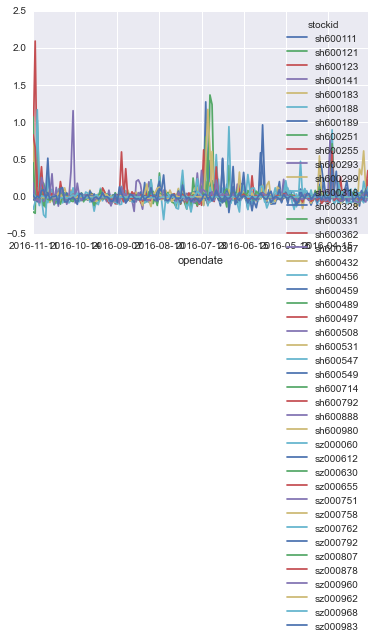

In [506]:
frame2.plot()